# 二值图像Hilditch细化算法

In [173]:
#coding:utf-8
import numpy as np
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
from scipy.ndimage.filters import convolve
from skimage.util import view_as_windows as viewW

In [108]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)

In [109]:
# 灰度化图片
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114]).astype(np.uint8)

def tobinary(gray,thresh):
    dst = np.zeros_like(gray)
    idx = (gray >= thresh)
    dst[idx] = 255
    return dst

In [110]:
def init_params(kpw, kpb):
    kpw.append(np.array([[0.,0.,0.],[0.,1.,1.],[0.,1.,0.]]))
    kpw.append(np.array([[0.,0.,0.],[0.,1.,0.],[1.,1.,0.]]))
    kpw.append(np.array([[0.,0.,0.],[1.,1.,0.],[0.,1.,0.]]))
    kpw.append(np.array([[1.,0.,0.],[1.,1.,0.],[0.,0.,0.]]))
    kpw.append(np.array([[0.,1.,0.],[1.,1.,0.],[0.,0.,0.]]))
    kpw.append(np.array([[0.,1.,1.],[0.,1.,0.],[0.,0.,0.]]))
    kpw.append(np.array([[0.,1.,0.],[0.,1.,1.],[0.,0.,0.]]))
    kpw.append(np.array([[0.,0.,0.],[0.,1.,1.],[0.,0.,1.]]))
    kpb.append(np.array([[1.,1.,0.],[1.,0.,0.],[0.,0.,0.]]))
    kpb.append(np.array([[1.,1.,1.],[0.,0.,0.],[0.,0.,0.]]))
    kpb.append(np.array([[0.,1.,1.],[0.,0.,1.],[0.,0.,0.]]))
    kpb.append(np.array([[0.,0.,1.],[0.,0.,1.],[0.,0.,1.]]))
    kpb.append(np.array([[0.,0.,0.],[0.,0.,1.],[0.,1.,1.]]))
    kpb.append(np.array([[0.,0.,0.],[0.,0.,0.],[1.,1.,1.]]))
    kpb.append(np.array([[0.,0.,0.],[1.,0.,0.],[1.,1.,0.]]))
    kpb.append(np.array([[1.,0.,0.],[1.,0.,0.],[1.,0.,0.]]))
    
def thinning_hilditch(src):
    kpw = []
    kpb = []
    init_params(kpw,kpb)
    src_w = np.array(src, dtype=np.float32)/255.
    thresh, src_b = cv2.threshold(src_w, 0.5, 1.0, cv2.THRESH_BINARY_INV)
    thresh, src_f = cv2.threshold(src_w, 0.5, 1.0, cv2.THRESH_BINARY)
    thresh, src_w = cv2.threshold(src_w, 0.5, 1.0, cv2.THRESH_BINARY)
    th = 1.
    
    while th > 0:
        th = 0.
        for i in range(8):
            src_w = cv2.filter2D(src_w, cv2.CV_32F, kpw[i])
            src_b = cv2.filter2D(src_b, cv2.CV_32F, kpb[i])
            thresh, src_w = cv2.threshold(src_w, 2.99, 1, cv2.THRESH_BINARY)
            thresh, src_b = cv2.threshold(src_b, 2.99, 1, cv2.THRESH_BINARY)
            src_w = np.array(np.logical_and(src_w,src_b), dtype=np.float32)
            th += np.sum(src_w)
            src_f = np.array(np.logical_xor(src_f, src_w), dtype=np.float32)
            src_w = src_f.copy()
            thresh, src_b = cv2.threshold(src_f, 0.5, 1.0, cv2.THRESH_BINARY_INV)
    return src_f,src_w

In [111]:
gray = rgb2gray(src)
src_f,src_w = thinning_hilditch(gray)

Text(0.5,1,'Result 2')

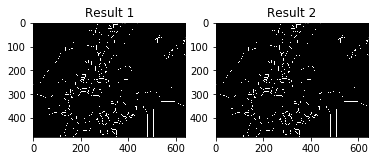

In [112]:
plt.subplot(121)
plt.imshow(cv2.convertScaleAbs(src_f),'gray')
plt.title('Result 1')
plt.subplot(122)
plt.imshow(cv2.convertScaleAbs(src_w),'gray')
plt.title('Result 2')

In [113]:
def rev_thinning_Hi(img):
	kpw = []
	kpb = []

	init_params(kpw, kpb)
	src_w = np.array(img, dtype=np.float32)/255.
	thresh, src_b = cv2.threshold(src_w, 0.5, 1.0, cv2.THRESH_BINARY)

	thresh, src_f = cv2.threshold(src_w, 0.5, 1.0, cv2.THRESH_BINARY_INV)
	thresh, src_w = cv2.threshold(src_w, 0.5, 1.0, cv2.THRESH_BINARY_INV)

	th = 1.
	while th > 0:
		th = 0.
		for i in range(8):
			src_w = cv2.filter2D(src_w, cv2.CV_32F, kpw[i])
			src_b = cv2.filter2D(src_b, cv2.CV_32F, kpb[i])
			thresh, src_w = cv2.threshold(src_w, 2.99, 1, cv2.THRESH_BINARY)
			thresh, src_b = cv2.threshold(src_b, 2.99, 1, cv2.THRESH_BINARY)
			src_w = np.array(np.logical_and(src_w,src_b), dtype=np.float32)
			th += np.sum(src_w)
			src_f = np.array(np.logical_xor(src_f, src_w), dtype=np.float32)
			src_w = src_f.copy()
			thresh, src_b = cv2.threshold(src_f, 0.5, 1.0, cv2.THRESH_BINARY_INV)
			#cv.imshow('result', src_w)
			#cv.waitKey(10)

	thresh, ret_img = cv2.threshold(src_f, 0.5, 255.0, cv2.THRESH_BINARY_INV)
	return ret_img.astype(np.uint8)

In [114]:
dst = rev_thinning_Hi(gray)

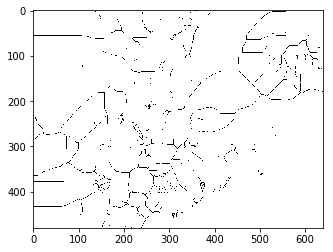

In [115]:
plt.imshow(dst,'gray')

In [116]:
def thinning_Hi(img):
	kpw = []
	kpb = []

	init_params(kpw, kpb)
	src_w = np.array(img, dtype=np.float32)/255.
	thresh, src_b = cv2.threshold(src_w, 0.5, 1.0, cv2.THRESH_BINARY_INV)
	thresh, src_f = cv2.threshold(src_w, 0.5, 1.0, cv2.THRESH_BINARY)
	thresh, src_w = cv2.threshold(src_w, 0.5, 1.0, cv2.THRESH_BINARY)
	th = 1.
	while th > 0:
		th = 0.
		for i in range(8):
			src_w = cv2.filter2D(src_w, cv2.CV_32F, kpw[i])
			src_b = cv2.filter2D(src_b, cv2.CV_32F, kpb[i])
			thresh, src_w = cv2.threshold(src_w, 2.99, 1, cv2.THRESH_BINARY)
			thresh, src_b = cv2.threshold(src_b, 2.99, 1, cv2.THRESH_BINARY)
			src_w = np.array(np.logical_and(src_w,src_b), dtype=np.float32)
			th += np.sum(src_w)
			src_f = np.array(np.logical_xor(src_f, src_w), dtype=np.float32)
			src_w = src_f.copy()
			thresh, src_b = cv2.threshold(src_f, 0.5, 1.0, cv2.THRESH_BINARY_INV)

	thresh, ret_img = cv2.threshold(src_f, 0.5, 255.0, cv2.THRESH_BINARY)
	return ret_img.astype(np.uint8)

In [117]:
dst = thinning_Hi(gray)

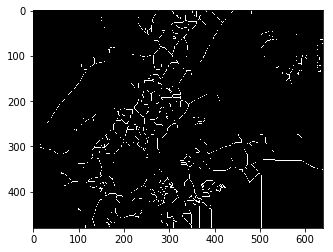

In [118]:
plt.imshow(dst,'gray')

In [138]:
def quick_thinning(binary):
    rows,cols = binary.shape
    F = np.zeros_like(binary)
    G = np.zeros_like(binary)
    M = np.zeros_like(binary)
    out = np.zeros_like(binary)
    
    for i in range(1,rows-1):
        for j in range(1,cols-1):
            if binary[i,j] == 0:
                F[i,j] = 0
            else:
                mi = [F[i,j-1],F[i-1,j-1],F[i-1,j],F[i-1,j+1]]
                F[i,j] = np.min(mi) + 1
    
    for i in range(rows-2,0,-1):
        for j in range(1,cols-1):
            if binary[i,j] == 0:
                G[i,j] = 0
            else:
                mi = [G[i+1,j-1],G[i+1,j],G[i+1,j+1],G[i,j+1]]
                G[i,j] = np.min(mi) + 1
                
    for i in range(1,rows-1):
        for j in range(1,cols-1):
            mi = [F[i,j],G[i,j]]
            M[i,j] = np.min(mi)
            
    for i in range(1,rows-1):
        for j in range(1,cols-1):
            ma = [M[i,j-1],M[i-1,j-1],M[i-1,j],M[i-1,j+1],M[i+1,j-1],M[i+1,j],M[i+1,j+1],M[i,j+1]]
            if M[i,j] == np.max(ma):
                out[i,j] = M[i,j]
            else:
                out[i,j] = 0
                
    return cv2.convertScaleAbs(out*255)

In [145]:
src = cv2.cvtColor(cv2.imread('../datas/char.jpg'),cv2.COLOR_BGR2RGB)
gray = rgb2gray(src)
binary = cv2.convertScaleAbs(tobinary(gray,120) / 255)
dst = quick_thinning(binary)

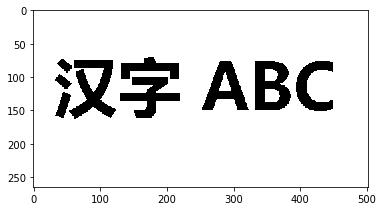

In [148]:
plt.imshow(binary,'gray')

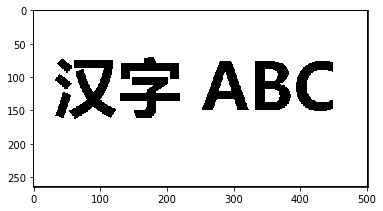

In [147]:
plt.imshow(dst,'gray')

In [163]:
def thin(src,iterations = 1):
    isFinished = False
    rows,cols = src.shape
    dst = np.zeros_like(src)
    for k in range(iterations):
        for i in range(1,rows-1):
            for j in range(1,cols-1):
                pC = src[i,j]
                if pC > 0:
                    ap = 0
                    p2 = int((src[i-1,j] > 0))
                    p3 = int((src[i-1,j+1] > 0))
                    if p2 == 0 and p3 == 1:
                        ap += 1
                    p4 = int((src[i,j+1] > 0))
                    if p3 == 0 and p4 == 1:
                        ap += 1
                    p5 = int((src[i+1,j+1] > 0))
                    if p4 == 0 and p5 == 1:
                        ap +=1
                    p6 = int((src[i+1,j] > 0))
                    if p5 == 0 and p6 == 1:
                        ap += 1
                    p7 = int((src[i+1,j-1] > 0))
                    if p6 == 0 and p7 == 1:
                        ap += 1
                    p8 = int((src[i,j-1] > 0))
                    if p7 == 0 and p8 == 1:
                        ap += 1
                    p9 = int((src[i-1,j-1] > 0))
                    if p8 == 0 and p9 == 1:
                        ap += 1
                    if p9 == 0 and p2 == 1:
                        ap += 1
                         
                    if (p2+p3+p4+p5+p6+p7+p8+p9) > 1 and (p2+p3+p4+p5+p6+p7+p8+p9) < 7:
                        if ap == 1:
                            if (p2 * p4 * p6 == 0) and (p4 * p6 * p8 ==0):
                                dst[i,j] = 0
                                isFinished = True
                                
            tmpImg = dst.copy()
            for i in range(1,rows-1):
                for j in range(1,cols-1):
                    if tmpImg[i,j] > 0:
                        ap = 0
                        p2 = int(tmpImg[i - 1,j] > 0)
                        p3 = int(tmpImg[i - 1,j + 1] > 0)
                        if p2 == 0 and p3 == 1:
                            ap += 1
                        p4 = int(tmpImg[i,j+1] > 0)
                        if p3 == 0 and p4 == 1:
                            ap += 1
                        p5 = int(tmpImg[i+1,j+1] > 0)
                        if p4 == 0 and p5 == 1:
                            ap += 1
                        p6 = int(tmpImg[i+1,j] > 0)
                        if p5 == 0 and p6 == 1:
                            ap += 1
                        p7 = int(tmpImg[i+1,j-1] > 0)
                        if p6 ==0 and p7 == 1:
                            ap += 1
                        p8 = int(tmpImg[i,j-1] > 0)
                        if p7 == 0 and p8 == 1:
                            ap += 1
                        p9 = int(tmpImg[i-1,j-1] > 0)
                        if p8 == 0 and p9 == 1:
                            ap += 1
                            
                        if p9 == 0 and p2 == 1:
                            ap += 1
                        if (p2+p3+p4+p5+p6+p7+p8+p9) > 1 and (p2+p3+p4+p5+p6+p7+p8+p9) < 7:
                            if ap == 1:
                                if (p2*p4*p8 == 0) and (p2 * p6 * p8 == 0):
                                    dst[i,j] = 0
                                    isFinished = True
                        
            if isFinished:
                break
    return dst
                    

In [164]:
dst = thin(binary,3)

In [165]:
print(dst)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


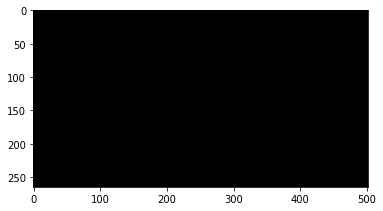

In [166]:
plt.imshow(cv2.convertScaleAbs(dst*255),'gray')

In [180]:
def skeletonize(bimg, term_thres=0):
    assert len(bimg.shape) == 2, 'must be binary img'
    def A(a):  
        # woodoo magic !!
        side_size = (3,3)
        ext_size = (side_size[0]-1)//2, (side_size[1]-1)//2
        img = np.pad(a, ([ext_size[0]],[ext_size[1]]), 'constant', constant_values=(0))
        out = viewW(img, side_size)
        out = out.reshape(out.shape[0:2] + (9,))
        out = out[:,:,np.uint8([1,2,5,8,7,6,3,0,1])]
        out[:,:,-1] = out [:,:,0]
        n_0to1 = np.zeros(a.shape, np.uint8)
        n_0to1[:,:] = np.sum(np.diff(out[:,:], axis=2) == 1 , axis=2)
        n_0to1[0,:] = 0
        n_0to1[-1,:] = 0
        n_0to1[:,0] = 0
        n_0to1[:,-1] = 0
        return n_0to1

    n_step1, n_step2 = np.inf ,np.inf

    zthinning = bimg.astype(np.float32)
    zthinning[zthinning !=0] = 1
    
    while n_step1 > term_thres or n_step2 > term_thres:

        step10 = zthinning == 1

        step11_kernel = np.ones((3,3),np.float32)
        step11_mask = convolve(zthinning,step11_kernel)
        step11 = (step11_mask >= 2) & (step11_mask <= 6)


        step12 = A(zthinning) == 1

        step13_kernel = np.float32([[0,-1,0],[0,0,-1],[0,-1,0]])
        step13_mask = convolve(zthinning,step13_kernel)
        step13 = step13_mask > -3

        step14_kernel = np.float32([[0,0,0],[-1,0,-1],[0,-1,0]])
        step14_mask =convolve(zthinning,step14_kernel)
        step14 = step14_mask > -3

        step1_mask = step10 & step11 & step12 & step13 & step14

        n_step1 = np.count_nonzero(step1_mask)

        zthinning[step1_mask] = 0


        step20 = zthinning == 1

        step21_kernel = np.ones((3,3),np.float32)
        step21_mask = convolve(zthinning,step21_kernel)
        step21 = (step21_mask >= 2) & (step21_mask <= 6)

        step22 = A(zthinning) == 1

        step23_kernel = np.float32([[0,-1,0],[-1,0,-1],[0,0,0]])
        step23_mask = convolve(zthinning,step23_kernel)
        step23 = step23_mask > -3

        step24_kernel = np.float32([[0,-1,0],[-1,0,0],[0,-1,0]])
        step24_mask = convolve(zthinning,step24_kernel)
        step24 = step24_mask > -3

        step2_mask = step20 & step21 & step22 & step23 & step24

        n_step2 = np.count_nonzero(step2_mask)
        zthinning[step2_mask] = 0
    
    return zthinning.astype(np.uint8)

In [197]:
src = cv2.cvtColor(cv2.imread('../datas/char.jpg'),cv2.COLOR_BGR2RGB)
gray = rgb2gray(src)
import skimage.filters
from skimage.filters.thresholding import threshold_otsu
# binary = gray[gray < cv2.convertScaleAbs(threshold_otsu(gray))]
# dst = skeletonize(binary)
thresh = threshold_otsu(gray)
binary = (gray < thresh)
dst = skeletonize(binary)

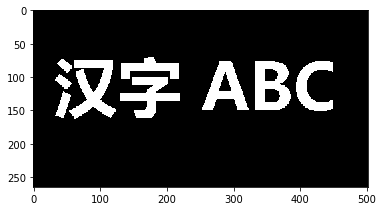

In [198]:
plt.imshow(binary,'gray')

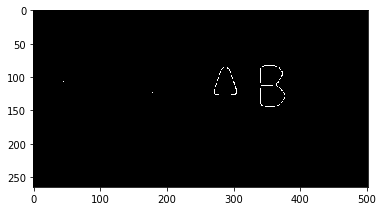

In [199]:
plt.imshow(dst,'gray')

In [200]:
def neighbours(x,y,image):
    "Return 8-neighbours of image point P1(x,y), in a clockwise order"
    img = image
    x_1, y_1, x1, y1 = x-1, y-1, x+1, y+1
    return [ img[x_1][y], img[x_1][y1], img[x][y1], img[x1][y1],     # P2,P3,P4,P5
                img[x1][y], img[x1][y_1], img[x][y_1], img[x_1][y_1] ]    # P6,P7,P8,P9

In [201]:
def transitions(neighbours):
    "No. of 0,1 patterns (transitions from 0 to 1) in the ordered sequence"
    n = neighbours + neighbours[0:1]      # P2, P3, ... , P8, P9, P2
    return sum( (n1, n2) == (0, 1) for n1, n2 in zip(n, n[1:]) )  # (P2,P3), (P3,P4), ... , (P8,P9), (P9,P2)

In [202]:
def zhangSuen(image):
    "the Zhang-Suen Thinning Algorithm"
    Image_Thinned = image.copy()  # deepcopy to protect the original image
    changing1 = changing2 = 1        #  the points to be removed (set as 0)
    while changing1 or changing2:   #  iterates until no further changes occur in the image
        # Step 1
        changing1 = []
        rows, columns = Image_Thinned.shape               # x for rows, y for columns
        for x in range(1, rows - 1):                     # No. of  rows
            for y in range(1, columns - 1):            # No. of columns
                P2,P3,P4,P5,P6,P7,P8,P9 = n = neighbours(x, y, Image_Thinned)
                if (Image_Thinned[x][y] == 1     and    # Condition 0: Point P1 in the object regions 
                    2 <= sum(n) <= 6   and    # Condition 1: 2<= N(P1) <= 6
                    transitions(n) == 1 and    # Condition 2: S(P1)=1  
                    P2 * P4 * P6 == 0  and    # Condition 3   
                    P4 * P6 * P8 == 0):         # Condition 4
                    changing1.append((x,y))
        for x, y in changing1: 
            Image_Thinned[x][y] = 0
        # Step 2
        changing2 = []
        for x in range(1, rows - 1):
            for y in range(1, columns - 1):
                P2,P3,P4,P5,P6,P7,P8,P9 = n = neighbours(x, y, Image_Thinned)
                if (Image_Thinned[x][y] == 1   and        # Condition 0
                    2 <= sum(n) <= 6  and       # Condition 1
                    transitions(n) == 1 and      # Condition 2
                    P2 * P4 * P8 == 0 and       # Condition 3
                    P2 * P6 * P8 == 0):            # Condition 4
                    changing2.append((x,y))    
        for x, y in changing2: 
            Image_Thinned[x][y] = 0
    return Image_Thinned

In [203]:
dst = zhangSuen(binary)

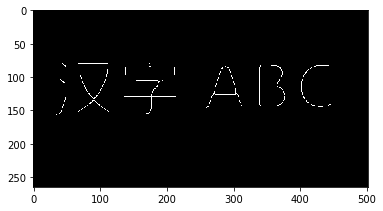

In [206]:
plt.imshow(dst,'gray')

In [220]:
def skeletonize(image, size, structuring=cv2.MORPH_RECT):
    # determine the area (i.e. total number of pixels in the image),
    # initialize the output skeletonized image, and construct the
    # morphological structuring element
    area = image.shape[0] * image.shape[1]
    skeleton = np.zeros(image.shape, dtype="uint8")
    elem = cv2.getStructuringElement(structuring, size)

    # keep looping until the erosions remove all pixels from the
    # image
    while True:
        # erode and dilate the image using the structuring element
        eroded = cv2.erode(image, elem)
        temp = cv2.dilate(eroded, elem)

        # subtract the temporary image from the original, eroded
        # image, then take the bitwise 'or' between the skeleton
        # and the temporary image
        temp = cv2.subtract(image, temp)
        skeleton = cv2.bitwise_or(skeleton, temp)
        image = eroded.copy()

        # if there are no more 'white' pixels in the image, then
        # break from the loop
        if area == area - cv2.countNonZero(image):
            break

    # return the skeletonized image
    return skeleton

In [222]:
dst = skeletonize(gray,size=(3, 3))

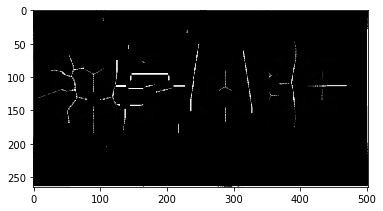

In [223]:
plt.imshow(dst,'gray')


参考：

[1]. https://blog.csdn.net/qq_27208177/article/details/54020521

[2]. https://blog.csdn.net/klose93/article/details/54564519

[2]. https://blog.csdn.net/cdrxyf/article/details/47779667

[3]. https://www.cnblogs.com/denny402/p/5167414.html